In [1]:
# Vi importerar det vi behöver

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

informaton om datan 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None 

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170 

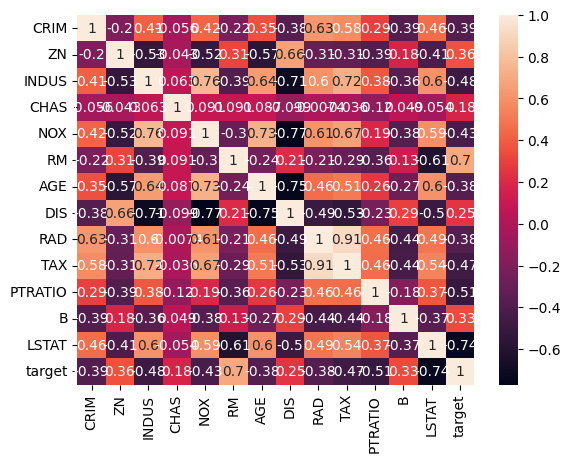

In [2]:
# importera datan från csv-filen
boston = pd.read_csv('boston.csv')

# Vi tar bort den första kolumnen som inte behövs
del boston['Unnamed: 0']

# Vi kollar om det finns några null-värden och ispektar datan
print('informaton om datan', '\n')
print(boston.info(), '\n')
print(boston.describe(), '\n')
print('Vi kollar om det finns några null-värden', '\n')
print(boston.isnull().sum())
print('\n')
# Vi kollar om det finns några outliers i datan
corr = boston.corr(method="pearson")
print('vi kollar om det finns några outliers i datan', '\n')
print(corr)
print('Vi printar ut correlationer som en grafik', '\n')
sns.heatmap(corr,annot=True, )
plt.show()

VI BÖRJAR REGRESSIONER


In [3]:
# Vi delar upp datan i X och y och kollar så att det stämmer
n = len(boston.columns)
X = boston.iloc[:,0:n-1].values
y = boston.iloc[:,n-1].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [4]:
# Vi sättar upp random state variabeln
RANDOM_STATE = 40

LINEAR REGRESSION

In [5]:
# Vi testar att göra en linjär regression
# Vi delar in datan i 70% träningdata och 30% testdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=RANDOM_STATE)

# Vi skapar vår tomma modell
lr_model = LinearRegression()

# Vi tränar modellen på vår data
lr_model.fit(X_train, y_train)

# Vi utvärderar modellen lite
print("Model's accuracy", '\n')
score_model = lr_model.score(X_test,y_test)
print("Score: ", score_model, '\n')

# Vi gör några predictions på X_test och kollar hur bra modellen är
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Predicitons accuracy', '\n')
y_pred = lr_model.predict(X_test)


# r2 
r2 = r2_score(y_test,y_pred)
print('r2: ', r2)

# Mean square error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: ", mse)

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)


Model's accuracy 

Score:  0.7215519718844154 

Predicitons accuracy 

r2:  0.7215519718844154
Mean squared error:  31.829631155557692
Mean absolute error:  3.907966145625533


CROSS VALIDATION

In [6]:
# Vi testar att göra en cross validation på modellen
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv = 5)
print("Cross validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross validation scores:  [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Mean cross-validation score:  0.35327592439588484


OTHER REGRESSION METHODS

In [7]:
"""# Vi testar att göra en random forest regression
from xgboost import XGBRegressor

# Vi skapar en regressor
xgb_model = XGBRegressor(random_state=RANDOM_STATE)

# vi skapar en parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'gamma': [0.01, 0.1],
    'learning_rate': [0.001, 0.001, 0.01, 0.1, 1]
}

# Vi skapar en grid search
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(
                estimator=xgb_model,                      # model to train
                param_grid=param_grid,                    # parameter grid
                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                refit='r2',                               # best estimator based on r2
                cv=5,                                     # 5-fold cross validation
                verbose=4
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)"""

"# Vi testar att göra en random forest regression\nfrom xgboost import XGBRegressor\n\n# Vi skapar en regressor\nxgb_model = XGBRegressor(random_state=RANDOM_STATE)\n\n# vi skapar en parameter grid\nparam_grid = {\n    'n_estimators': [100, 200, 500],\n    'max_depth': [3, 6, 9],\n    'gamma': [0.01, 0.1],\n    'learning_rate': [0.001, 0.001, 0.01, 0.1, 1]\n}\n\n# Vi skapar en grid search\nfrom sklearn.model_selection import GridSearchCV\n\nGS = GridSearchCV(\n                estimator=xgb_model,                      # model to train\n                param_grid=param_grid,                    # parameter grid\n                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()\n                refit='r2',                               # best estimator based on r2\n                cv=5,                                     # 5-fold cross validation\n                verbose=4\n                )\n\n# Vi tränar grid modellen\nGS.fit(X_train, y_train)"

In [8]:
# Vi testar att göra en random forest regression
from sklearn.linear_model import Ridge, Lasso

# vi skapar en parameter grid
param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV

In [9]:
# importering av GridSearchCV
from sklearn.model_selection import GridSearchCV

# Vi skapar en regressor
Ridge_model = Ridge(random_state=RANDOM_STATE)
Lasso_model = Lasso(random_state=RANDOM_STATE)

Ridge

In [10]:
# Vi skapar en grid search
GS = GridSearchCV(
                estimator=Ridge_model,                      # model to train
                param_grid=param_grid,                    # parameter grid
                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                refit='r2',                               # best estimator based on r2
                cv=5,                                     # 5-fold cross validation
                verbose=False
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", GS.best_params_)
print("Grid search best score: ", GS.best_score_)
print("Grid search best estimator: ", GS.best_estimator_)
print("Grid search best index: ", GS.best_index_)
print('\n')
# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(GS.cv_results_)
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
# Vi printar ut de 10 bästa resultaten sorterade efter r2
print(result_grid.sort_values(by='rank_test_r2').head(1))
print('\n')

# Träna en modell med de bästa värdena

Ridge_model = Ridge(alpha=GS.best_params_["alpha"])
Ridge_model.fit(X_train, y_train)
y_pred_ridge_GS = Ridge_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Ridge_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred_ridge_GS))
r2 = r2_score(y_test, y_pred_ridge_GS) 
rm = Ridge_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')


======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113878100615512
Grid search best estimator:  Ridge(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001715      0.000786         0.001025        0.000194       0.001   

             params  split0_test_r2  split1_test_r2  split2_test_r2  \
0  {'alpha': 0.001}        0.661365        0.795602         0.65327   

   split3_test_r2  ...  std_test_r2  rank_test_r2  \
0        0.747758  ...     0.053758             1   

   split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
0                          -27.633243                          -12.781423   

   split2_test_neg_mean_squared_error  split3_test_neg_mean_squared_error  \
0                          -26.925256                          -1

Lasso

In [11]:
# Vi skapar en grid search
GS = GridSearchCV(
                estimator=Lasso_model,                      # model to train
                param_grid=param_grid,                    # parameter grid
                scoring=['r2', 'neg_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                refit='r2',                               # best estimator based on r2
                cv=5,                                     # 5-fold cross validation
                verbose=False
                )

# Vi tränar grid modellen
GS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", GS.best_params_)
print("Grid search best score: ", GS.best_score_)
print("Grid search best estimator: ", GS.best_estimator_)
print("Grid search best index: ", GS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(GS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_r2').head(1))
print('\n')

# Träna en modell med de bästa värdena

Lasso_model = Lasso(alpha=GS.best_params_["alpha"])
Lasso_model.fit(X_train, y_train)
y_pred_lasso_GS = Lasso_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Lasso score: ", Lasso_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred_lasso_GS))
r2 = r2_score(y_test, y_pred_lasso_GS) 
rm = Lasso_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113017268913784
Grid search best estimator:  Lasso(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002926       0.00088          0.00169        0.000352       0.001   

             params  split0_test_r2  split1_test_r2  split2_test_r2  \
0  {'alpha': 0.001}        0.661089        0.795673        0.653078   

   split3_test_r2  ...  std_test_r2  rank_test_r2  \
0        0.747955  ...      0.05391             1   

   split0_test_neg_mean_squared_error  split1_test_neg_mean_squared_error  \
0                          -27.655763                          -12.776984   

   split2_test_neg_mean_squared_error  split3_test_neg_mean_squared_error  \
0                          -26.940182                          -1

RandomSearchCV

In [12]:
# importering av RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Vi skapar en regressor
Ridge_model = Ridge(random_state=RANDOM_STATE)
Lasso_model = Lasso(random_state=RANDOM_STATE)

Ridge

In [13]:
# Vi skapar en random search
RS = RandomizedSearchCV(estimator = Ridge_model,
                        param_distributions = param_grid,
                        n_iter = 5,
                        cv = 5,
                        verbose=False
                        )

# Vi tränar Random modellen
RS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", RS.best_params_)
print("Grid search best score: ", RS.best_score_)
print("Grid search best estimator: ", RS.best_estimator_)
print("Grid search best index: ", RS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(RS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_score').head(1))
print('\n')

# Träna en modell med de bästa värdena

Ridge_model = Ridge(alpha=RS.best_params_["alpha"])
Ridge_model.fit(X_train, y_train)
y_pred_ridge_RS = Ridge_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Ridge_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred_ridge_RS))
r2 = r2_score(y_test, y_pred_ridge_RS) 
rm = Ridge_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113878100615512
Grid search best estimator:  Ridge(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002136      0.001525         0.000668        0.000051       0.001   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.661365           0.795602            0.65327   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.747758           0.698944         0.711388        0.053758   

   rank_test_score  
0                1  


======= Evaluatition of the model =================
Ridge score:  0.7215528660031915
R2 score:  0.7215528660031915
Difference:  0.0




Lasso

In [14]:
# Vi skapar en random search
RS = RandomizedSearchCV(estimator = Lasso_model,
                        param_distributions = param_grid,
                        n_iter = 5,
                        cv = 5,
                        verbose=False
                        )

# Vi tränar Random modellen
RS.fit(X_train, y_train)

# Vi kollar vilka parametrar som är bäst
print('===================================================')
print('======= Evaluatition of the GRID ==================')
print('===================================================')
print("Grid search best hyperparameters: ", RS.best_params_)
print("Grid search best score: ", RS.best_score_)
print("Grid search best estimator: ", RS.best_estimator_)
print("Grid search best index: ", RS.best_index_)
print('\n')

# Vi skapar en dataframe med resultaten
result_grid = pd.DataFrame(RS.cv_results_)

# Vi printar ut de 10 bästa resultaten sorterade efter r2
print('===================================================')
print('======= Result of the GRID ========================')
print('===================================================')
print(result_grid.sort_values(by='rank_test_score').head(1))
print('\n')

# Träna en modell med de bästa värdena

Lasso_model = Lasso(alpha=RS.best_params_["alpha"])
Lasso_model.fit(X_train, y_train)
y_pred_lasso_RS = Lasso_model.predict(X_test)

# Utvärdera vår nya modell
print('===================================================')
print('======= Evaluatition of the model =================')
print('===================================================')
print("Ridge score: ", Lasso_model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred_lasso_RS))
r2 = r2_score(y_test, y_pred_lasso_RS) 
rm = Lasso_model.score(X_test, y_test)
diff = r2 - rm

print("Difference: ", diff)
print('\n')

======= Evaluatition of the GRID ==================
Grid search best hyperparameters:  {'alpha': 0.001}
Grid search best score:  0.7113017268913784
Grid search best estimator:  Lasso(alpha=0.001, random_state=40)
Grid search best index:  0


======= Result of the GRID ========================
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.00262      0.001781         0.000868        0.000263       0.001   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.661089           0.795673           0.653078   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.747955           0.698713         0.711302         0.05391   

   rank_test_score  
0                1  


======= Evaluatition of the model =================
Ridge score:  0.7215878740008921
R2 score:  0.7215878740008921
Difference:  0.0


